### Выявление закономерностей, влияющих на успешность игры

В нашем распоряжении данные об интернет-магазине, продающем компьютерные игры по всему миру:
 - продажи;
 - оценки пользователей;
 - оценки экспертов;
 - жанры;
 - платформы.
 
В исследовании будут выявлены закономерности, которые влияют на успешность игры.

### 1. Изучение общей информации о данных

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [346]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [347]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

В данных присутствуют пропуски в столбцах 
- Name;
- Year_of_Release;
- Genre;
- Critic_Score;
- User_Score;
- Rating.

Данные могли быть не указаны намеренно, либо при ошибках выгрузки из базы. Необходимо будет принять решение об обработке информации в этих столбцах. Также нужно будет привести данные к типам:
 - Year_of_Release, Critic_Score - к int;
 - NA_sales, EU_sales, JP_sales, Other_sales - к int (предварительно умножив на 100, чтобы не потерять дробную часть);
 - User_Score - к int (предварительно умножив на 10, чтобы не потерять дробную часть).


### 2. Подготовка данных

#### Приведем названия столбцов к нижнему регистру

In [348]:
games.columns = games.columns.str.lower()

In [349]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Обработаем пропущенные данные

1) Удалим строки с пропрущенными значениями name

In [350]:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [351]:
games = games.dropna(subset=['name'])

In [352]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Удалим эти строки из общего датасета как неинформативные. Практичеcки ничего про них не известно.

2) В столбце year_of_release удалим строки с пропущенными данными.

In [354]:
games = games.dropna(subset=['year_of_release'])

Приведем данные в этом столбце к типу int

In [356]:
games['year_of_release'] = games['year_of_release'].astype(int)

In [357]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


3) В столбце genre заменим пропущенные значения на *unknown*

In [358]:
games['genre'] = games['genre'].fillna('unknown')

In [359]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


4) Приведем данные в столбцах *na_sales, eu_sales, jp_sales* к типу int. Предварительно умножим каждое значение на 1000 для того, чтобы не потерять дробную часть. Тогда продажи будут выражаться не в млн., а в тыс. долларов. 

In [360]:
features = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for column in features:
    games[column] = (games[column] * 1000).astype('int')

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,NaN,NaN,NaN


5) Обработаем пропуски в столбцах critic_score, user_score и rating

Узнаем, в каких столбцах встречается рейтинг *tbd*

In [361]:
features = ['critic_score', 'user_score', 'rating']

for column in features:
    print(column, games.loc[games[column] == 'tbd'][column].count())
    

critic_score 0
user_score 2376
rating 0


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Такие значения встречаются только в столбце user_score.

tbd означает, что игра не набрала достаточного количества отзывов и оценка не выставлена. Приравням такие значения к NaN. 

Заменим все tbd на NaN.

In [362]:
# games['user_score'] = games['user_score'].fillna('tbd')
games['user_score'] = games['user_score'].replace('tbd', 'NaN')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null int64
eu_sales           16444 non-null int64
jp_sales           16444 non-null int64
other_sales        16444 non-null int64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.5+ MB


In [363]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,NaN,NaN,NaN


~~Заменим пустые значения в столбцах critic_score и значения tbd в столбце user_score на -1.~~

In [365]:
games['user_score'].head()

# умножим значения в столбце user_score на 10, чтобы не потерять дробную часть (теперь максимальный рейтинг - 100)
games['user_score'] = games['user_score'].astype('float') * 10

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,NaN,NaN,NaN


Вычислим среднюю оценку критиков и пользователей по каждому жанру игры (без учета NaN и tbd)

In [366]:
critics_genre_mean = games.query('critic_score != -1').groupby('genre')['critic_score'].mean()
critics_genre_mean

genre
Action          66.676931
Adventure       65.268750
Fighting        69.155556
Misc            66.648330
Platform        68.124490
Puzzle          67.231818
Racing          68.006897
Role-Playing    72.655267
Shooter         70.260022
Simulation      68.609195
Sports          71.993133
Strategy        72.158784
Name: critic_score, dtype: float64

In [367]:
user_genre_mean = games.query('user_score != -10').groupby('genre')['user_score'].mean()
user_genre_mean

genre
Action          70.581292
Adventure       71.395973
Fighting        72.959494
Misc            68.058275
Platform        73.058962
Puzzle          71.384000
Racing          70.408585
Role-Playing    76.244233
Shooter         70.532597
Simulation      71.321534
Sports          69.514339
Strategy        72.944262
Name: user_score, dtype: float64

Вычислим коэффициент, равный отношению среднего значения рейтинга критиков к среднему значению рейтинга пользователей. В дальнейшем будем его использовать для заполнения пропущенных значений в этих столбцах.

In [368]:
genre_coeff = critics_genre_mean / user_genre_mean
genre_coeff

genre
Action          0.944683
Adventure       0.914180
Fighting        0.947862
Misc            0.979283
Platform        0.932459
Puzzle          0.941833
Racing          0.965889
Role-Playing    0.952928
Shooter         0.996135
Simulation      0.961970
Sports          1.035659
Strategy        0.989232
dtype: float64

Заменим пустые значения в этих столбцах по следующему принципу:
- если в столбце critics_genre_mean пустое значение, а в user_genre_mean нет, то умножаем это значение на коэффициент и заполняем critics_genre_mean и наоборот (но значение делим на коэффициент);
- если значения в обоих столбцах пустые, то заполняем средним значением по жанру.

In [369]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,NaN,NaN,NaN


In [372]:
# функция для замены значений в столбце critic_score

def critic_change(row):
    if pd.isna(row['critic_score']) and pd.isna(row['user_score']):
        genre = row['genre'] 
        # заменяем пропущенное значение средним значнием по жанру
        return critics_genre_mean[genre]
    
    if pd.isna(row['critic_score']) and ~pd.isna(row['user_score']):
        genre = row['genre']
        value_critic = row['user_score'] * genre_coeff[genre] 
        return value_critic
    
    return row['critic_score']   

In [373]:
# функция для замены значений в столбце user_score

def user_change(row):
    if pd.isna(row['user_score']) and pd.isna(row['critic_score']):
        genre = row['genre'] 
        # заменяем пропущенное значение средним значнием по жанру
        return user_genre_mean[genre]
    
    if pd.isna(row['user_score']) and ~pd.isna(row['critic_score']):
        genre = row['genre']
        value_user = row['critic_score'] / genre_coeff[genre] 
        return value_user
    
    return row['user_score']   

In [374]:
# произведем замену пустых значений

games['critic_score'] = games.apply(critic_change, axis=1)
games['user_score'] = games.apply(user_change, axis=1)

# приведем все к типу int
games['critic_score'] = games['critic_score'].astype('int')
games['user_score'] = games['user_score'].astype('int')

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,68,73,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,72,76,NaN


In [375]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null int64
eu_sales           16444 non-null int64
jp_sales           16444 non-null int64
other_sales        16444 non-null int64
critic_score       16444 non-null int64
user_score         16444 non-null int64
rating             9768 non-null object
dtypes: int64(7), object(4)
memory usage: 1.5+ MB


Узнаем все возможные значения столбца rating

In [376]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим отсутствующие значения на unknown (т.к. чем-то осмысленным заменить не представляется возможным)

In [377]:
games['rating'].fillna('unknown', inplace=True)

In [378]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,68,73,unknown
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,72,76,unknown


In [379]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null int64
eu_sales           16444 non-null int64
jp_sales           16444 non-null int64
other_sales        16444 non-null int64
critic_score       16444 non-null int64
user_score         16444 non-null int64
rating             16444 non-null object
dtypes: int64(7), object(4)
memory usage: 1.5+ MB


6) Подсчет суммарных продаж во всех регионах

In [380]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [381]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76,80,E,82540
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,68,73,unknown,40240
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82,83,E,35520
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80,80,E,32770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,72,76,unknown,31380


### Вывод

Была проведена работа по подготовке данных к ислледованию. 

Численные типы в столбцах приведены к int. Удалены строки с пропущенными значениями в столбце year_of_release. 

В столбце user_score значения tbd приравняны к пустым значениям (tbd означает - неподтвержденный рейтинг, т.е., отсутствующий).

Пропущенные значения в столбцах critic_score и user_score заменены на основании коэффициента отношения среднего рейтинга критиков к среднему рейтингу пользователей (если было известно хотя бы одно значение). Если оба значения были пустыми, то замена производилась средним по жанру для каждого столбца.

В столбце rating пустые значения заменены на unknown.

Были удалены две строки, которые не содержали даже названия игры.

Также создан новый столбец с подсчитанными суммарными продажами во всех регионах.



### 3. Исследовательский анализ данных

#### 1) Вычисление количества игр, выпускавшихся в разные годы

In [382]:
games_without_year_ratio = games.query('year_of_release == -1')['year_of_release'].count() / len(games)
print('Процент игр без даты релиза составляет: {:.2%}'.format(games_without_year_ratio))

Процент игр без даты релиза составляет: 0.00%


не будем в дальнейшем принимать их в расчет

In [383]:
games = games.query('year_of_release != -1')

In [384]:
# оптимальное количество корзин для гистограммы распределения игр по годам
bins = len(games.groupby('year_of_release')['name'].count())

Построим гистограмму распределения игр по годам

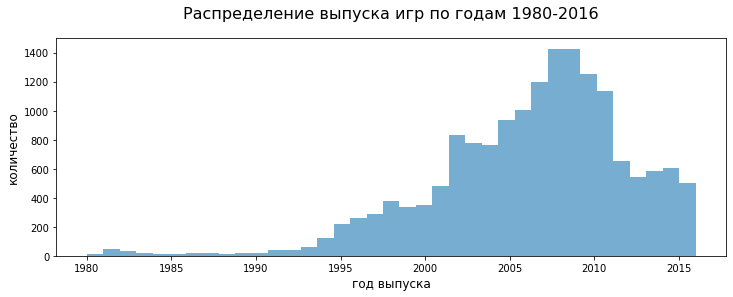

In [385]:
plt.figure(figsize=(12, 4))
plt.hist(games['year_of_release'], histtype='bar', bins=bins, alpha=0.6)
plt.title('Распределение выпуска игр по годам 1980-2016', pad=20, fontsize=16)
plt.xlabel('год выпуска', fontsize=12)
plt.ylabel('количество', fontsize=12)
plt.show()

На гистограмме наглядно видно, что, начиная с 1990 и по 2009 год количество игр растет, затем спадает до 2012 года и далее, до 2016, держится примерно на одном уровне.

Таким образом, нам будет интересен период времени с 1991 по 2016 года в связи с наибольшей активностью на игровом рынке.

In [386]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76,80,E,82540
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,68,73,unknown,40240
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82,83,E,35520
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80,80,E,32770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,72,76,unknown,31380


#### 2) Изменение продаж по платформам

Создадим срез по данным, которые будут соответствовать выбранным нами годам (с 1991 по 2016) 

In [387]:
games = games[games['year_of_release'] >= 1991]

Сгруппируем таблицу по платформам и суммарным продажам по годам

In [388]:
platform_year = games.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'})
platform_year.head(15)

total_sales
platform year_of_release             
3DO      1994                      20
         1995                      80
3DS      2011                   63199
         2012                   51359
         2013                   56570
         2014                   43760
         2015                   27780
         2016                   15140
DC       1998                    3380
         1999                    5160
         2000                    5990
         2001                    1070
         2002                     290
         2007                      20
         2008                      40

Сбросим индексы для удобства дальнейших расчетов

In [389]:
platform_year_index_out = platform_year.reset_index()
platform_year_index_out.head(15)

,platform,year_of_release,total_sales
0,3DO,1994,20
1,3DO,1995,80
2,3DS,2011,63199
3,3DS,2012,51359
4,3DS,2013,56570
5,3DS,2014,43760
6,3DS,2015,27780
7,3DS,2016,15140
8,DC,1998,3380
9,DC,1999,5160


Сгруппируем получившуюся таблицу по платформам и максимальным суммарным продажам по годам.

In [390]:
platform_year_max_total = platform_year_index_out.groupby(['platform']).agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)
platform_year_max_total.head(10)

,total_sales
platform,
PS2,1233557
X360,961239
PS3,931336
Wii,891178
DS,802760
PS,727577
PS4,314140
GBA,312880
PSP,289530


Выберем 10 первых платформ

In [391]:
platform_year_max_total = platform_year_max_total.iloc[0:10, 0]
platform_year_max_total

platform
PS2     1233557
X360     961239
PS3      931336
Wii      891178
DS       802760
PS       727577
PS4      314140
GBA      312880
PSP      289530
3DS      257808
Name: total_sales, dtype: int64

Создадим срез из таблицы platform_year, основываясь на полученных данных о 10-ти самых продаваемых платформах

In [392]:
top_platforms = list(platform_year_max_total.index)
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [393]:
# мультииндекс platform_year входит в top_platforms
ten_most_sales = platform_year.query('platform in @top_platforms')
ten_most_sales.head(10)

total_sales
platform year_of_release             
3DS      2011                   63199
         2012                   51359
         2013                   56570
         2014                   43760
         2015                   27780
         2016                   15140
DS       2004                   17270
         2005                  130140
         2006                  119810
         2007                  146940

In [394]:
# ten_most_sales.index.levels[0]
ten_most_sales.index.unique().levels[0]


Index(['3DS', 'DS', 'GBA', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360'], dtype='object', name='platform')

In [395]:
ten_most_sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 96 entries, (3DS, 2011) to (X360, 2016)
Data columns (total 1 columns):
total_sales    96 non-null int64
dtypes: int64(1)
memory usage: 1.5+ KB


In [396]:
ten_most_sales_index_off = ten_most_sales.reset_index() # сбросим индексы

In [397]:
ten_most_sales_index_off.head(20)

,platform,year_of_release,total_sales
0,3DS,2011,63199
1,3DS,2012,51359
2,3DS,2013,56570
3,3DS,2014,43760
4,3DS,2015,27780
5,3DS,2016,15140
6,DS,2004,17270
7,DS,2005,130140
8,DS,2006,119810
9,DS,2007,146940


Построим графики для топ-10 платформ

In [398]:
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

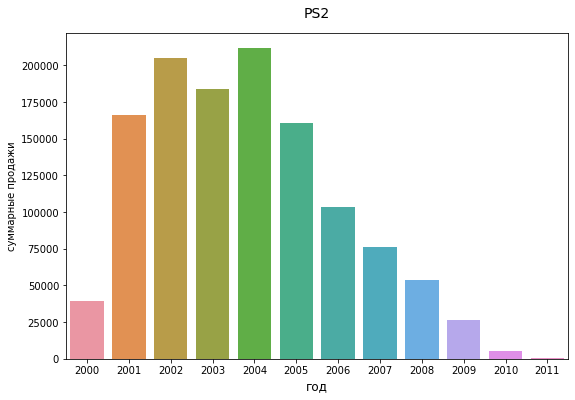

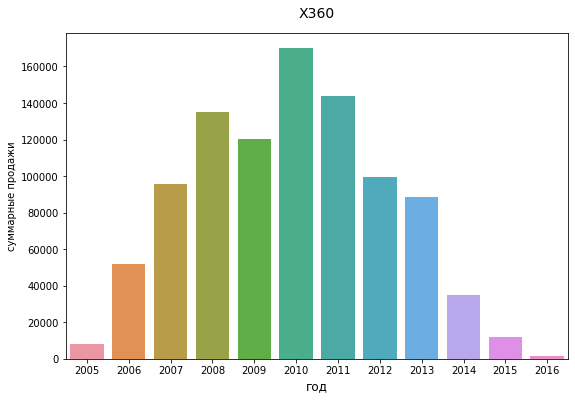

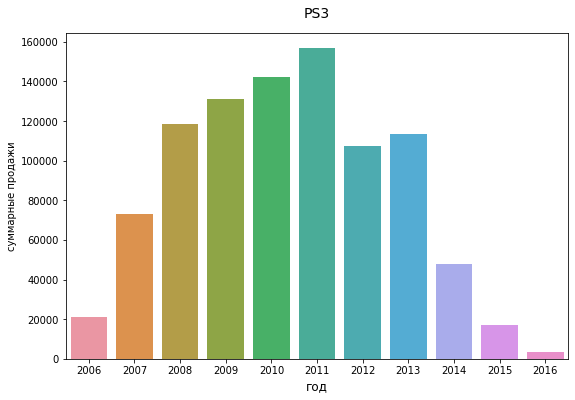

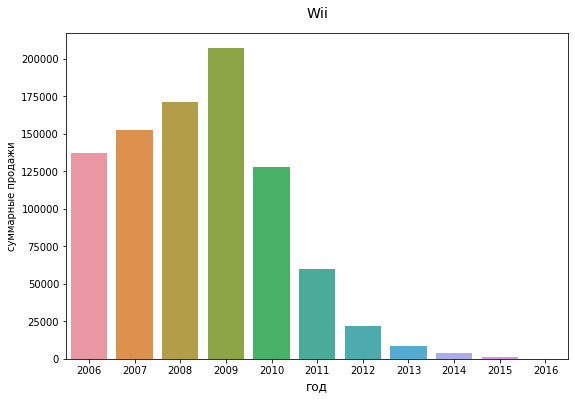

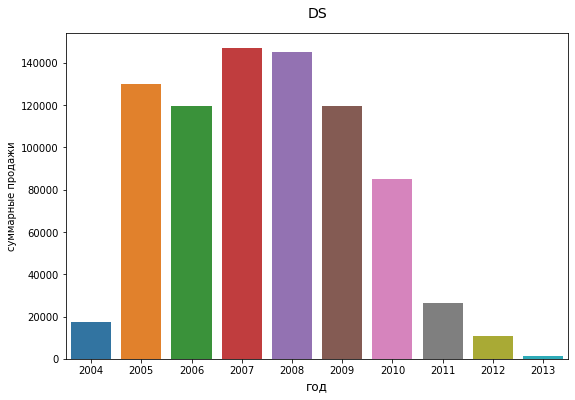

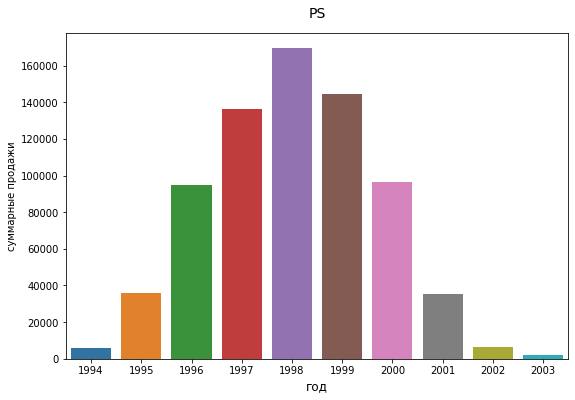

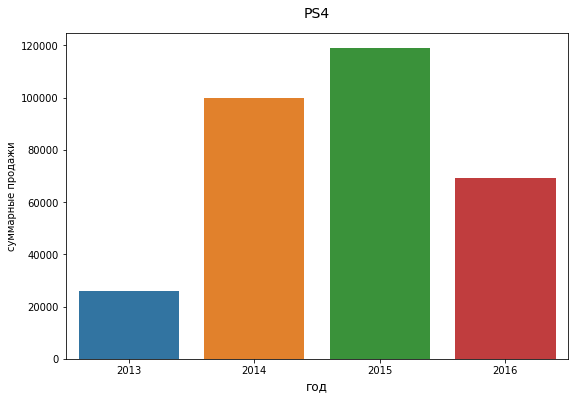

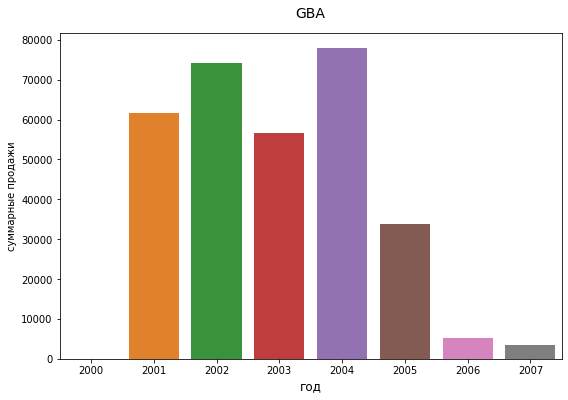

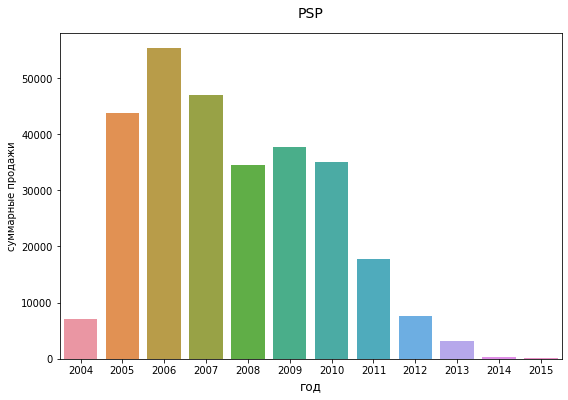

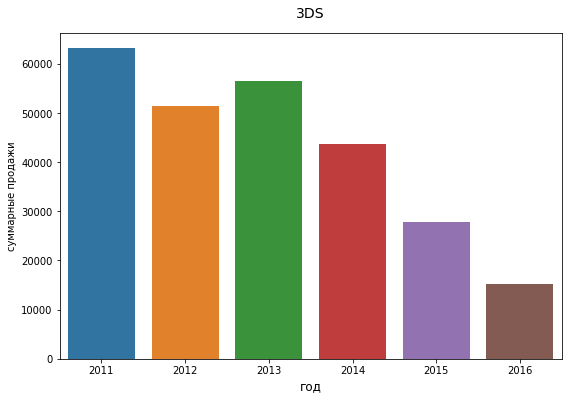

In [399]:
for column in top_platforms:
    plt.figure(figsize=(9, 6))
    tmp = ten_most_sales_index_off[ten_most_sales_index_off['platform'] == column]
    sns.barplot(tmp['year_of_release'], tmp['total_sales']) # barplot из seaborn
    plt.title(column, pad=15, fontsize=14)
    plt.xlabel('год', fontsize=12)
    plt.ylabel('суммарные продажи')
    plt.show()

В среднем, срок жизни каждой платфоры на рынке составляет около 9 лет. Однако, присутствуют и такие, которые к 2016 году еще не утратили своей популярности.

#### 3) Выбор актуальных данных

Рассичтаем жизненный цикл топ 10 платформ.

In [400]:
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [401]:
# будем считать цикл как разницу между годом окончания продаж и годом начала продаж
top_ten_by_year = ten_most_sales_index_off.query('platform in @top_platforms')
delta_years = top_ten_by_year.groupby('platform')['year_of_release'].max() - \
    top_ten_by_year.groupby('platform')['year_of_release'].min()

delta_years

platform
3DS      5
DS       9
GBA      7
PS       9
PS2     11
PS3     10
PS4      3
PSP     11
Wii     10
X360    11
Name: year_of_release, dtype: int64

По данным значениям видно, что платформы PS4 и 3DS явно находятся не в конце своего цикла. Глядя на гистограммы распределения платформ по года, можно увидеть, что 3DS продается с 2011 года, а PS4 с 2013 г. Таким образом, актуальным периодом будем считать 2013 - 2016 г.

In [402]:
games = games[games['year_of_release'] >= 2013]
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int64
genre              2233 non-null object
na_sales           2233 non-null int64
eu_sales           2233 non-null int64
jp_sales           2233 non-null int64
other_sales        2233 non-null int64
critic_score       2233 non-null int64
user_score         2233 non-null int64
rating             2233 non-null object
total_sales        2233 non-null int64
dtypes: int64(8), object(4)
memory usage: 226.8+ KB


#### 4) Выбор потенциально прибыльных платформ

Глядя на графики, можно сделать вывод, что продажи по всем платформам падают после определенного роста. В тройку лидеров по продажам входят платформы PS2, X360 и PS3, их продажи также снижаются.

К потенциально прибыльным можно отнести две: PS4 и 3DS, т.к. их продажи тоже уменьшаются, но продолжают оставаться на достаточно высоком уровне.

#### 5) Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 

In [403]:
platforms_future = ['3DS', 'PS4']
games_future = games.query('platform in @platforms_future')

In [404]:
games_future.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6030,5860,360,2380,70,70,unknown,14630
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5280,4190,4350,780,72,76,unknown,14600
42,Grand Theft Auto V,PS4,2014,Action,3960,6310,380,1970,97,83,M,12620
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4350,3490,3100,740,72,76,unknown,11680
77,FIFA 16,PS4,2015,Sports,1120,6120,60,1280,82,43,E,8580


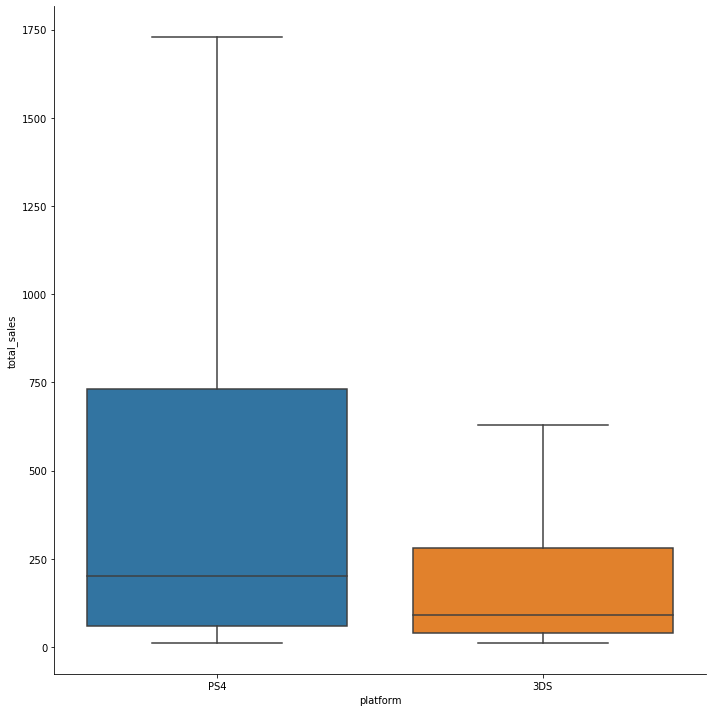

In [405]:
sns.catplot(x='platform', y='total_sales', kind='box', height=10, showfliers = False, data=games_future)
plt.show()

In [406]:
# медианное значение для продаж по каждой перспективной платформе
games_future.groupby('platform')['total_sales'].median()

platform
3DS     90
PS4    200
Name: total_sales, dtype: int64

In [407]:
# среднее значение для продаж по каждой перспективной платформе
games_future.groupby('platform')['total_sales'].mean()

platform
3DS    472.772277
PS4    801.377551
Name: total_sales, dtype: float64

Вычислим дисперсию и стандартное отклонение значений продаж для обеих платформ

In [408]:
# Функция для вычисления дисперсии и стандартного отклонения

def var_std(plt):
    variance_plt = np.var(games_future[games_future['platform'] == plt]['total_sales'], ddof=1)
    std_plt = np.sqrt(variance_plt)
    print(f'Платформа {plt}')
    print()
    print('дисперсия: ', variance_plt)    
    print('стандартное отклонение: ', std_plt)

In [409]:
# значения дисперсии и СКО для 3DS
var_std('3DS')

Платформа 3DS

дисперсия:  1908118.7790964525
стандартное отклонение:  1381.3467266028658


In [410]:
# значения дисперсии и СКО для PS4
var_std('PS4')

Платформа PS4

дисперсия:  2590349.504149486
стандартное отклонение:  1609.4562759359094


Глядя на графики boxplot, и значения стандартного отклонения, можно сказать, что величины продаж для платформы 3DS меньше различаются между собой, чем, для платформы PS4 (СКО 3DS = 1381, СКО PS4 = 1609).

Среднее значение и медиана больше примерно в 2 раза для PS4.

#### 6) Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Выберем для анализа платформу PS4

Создадим датасет, состоящий из столбцов с отзывами пользователей, критиков и суммой продаж

In [411]:
# срез по PS4
slice_ps4 = games_future.query('platform == "PS4"')

In [412]:
critic_sales_ps4 = slice_ps4[['platform', 'critic_score', 'user_score', 'total_sales']]
critic_sales_ps4.head()

,platform,critic_score,user_score,total_sales
31,PS4,70,70,14630
42,PS4,97,83,12620
77,PS4,82,43,8580
87,PS4,70,70,7980
92,PS4,83,57,7660


Построим совметное распределение для PS4

<Figure size 800x640 with 0 Axes>

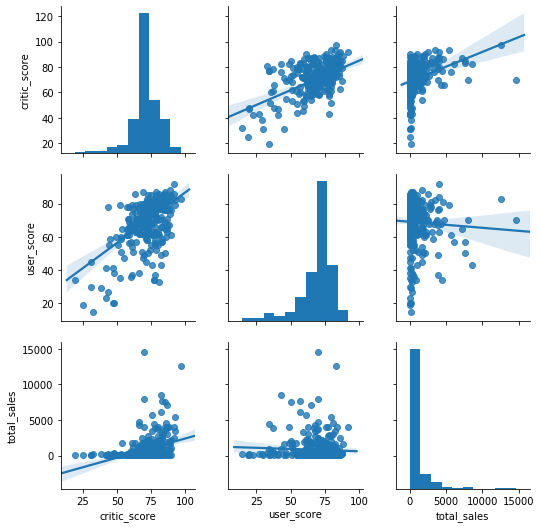

In [413]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(critic_sales_ps4, kind='reg')
plt.show()

In [414]:
# расчет корреляции
critic_sales_ps4.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.531882,0.352999
user_score,0.531882,1.000000,-0.048563
total_sales,0.352999,-0.048563,1.000000


Ярковыраженной корреляции между между рейтингами критиков (пользователей) и суммами продаж не наблюдается.

Проделаем то же для 3DS

In [415]:
# срез по 3DS
slice_3ds = games_future.query('platform == "3DS"')

In [416]:
critic_sales_3ds = slice_3ds[['platform', 'critic_score', 'user_score', 'total_sales']]
critic_sales_3ds.head()

,platform,critic_score,user_score,total_sales
33,3DS,72,76,14600
47,3DS,72,76,11680
96,3DS,69,72,7550
108,3DS,72,76,7140
184,3DS,68,71,5220


<Figure size 800x640 with 0 Axes>

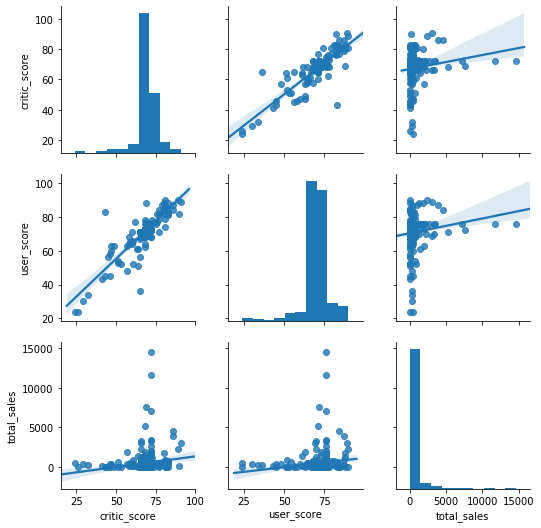

In [417]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(critic_sales_3ds, kind='reg')
plt.show()

In [418]:
critic_sales_3ds.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.859230,0.157711
user_score,0.859230,1.000000,0.143363
total_sales,0.157711,0.143363,1.000000


Та же картина. Корреляции не наблюдается.



#### 7)  Соотношение выводов с продажми игр на других платформах

Исходя из того, что даже у популярных платформ рейтинг не влияет на продажи, можно сказать, что продажи других платформ также не будут зависеть от рейтинга пользователей и критиков.

#### 8) Общее распределение игр по жанрам

Выделим таблицу, состоящую из жанров и продаж

In [419]:
genre_sales = games[['genre', 'total_sales']]

In [420]:
genre_sales.head()

,genre,total_sales
16,Action,21050
23,Action,16270
31,Shooter,14630
33,Role-Playing,14600
42,Action,12620


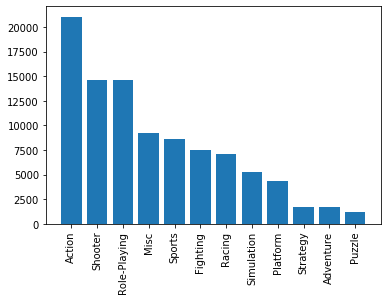

In [421]:
plt.bar(genre_sales['genre'], genre_sales['total_sales'])
plt.xticks(rotation=90)
plt.show()


Самые высокие продажи у жанра Action. Самые низкие - Strategy, Adventure и Puzzle.



### Вывод

На данном этапе было проведено исследование данных по продажам в зависимости от типа платформы и жанра.

Был выбран актуальный период с 2013 по 2016 г.

Были выявлены 10 платформ с наиболее массовыми продажами. Также установлены две потенциалльно прибыльные - PS4 и 3DS.

Определена зависимость продаж платформ от рейтинга критиков и пользователей. Оказалось, что она отсутствует.

Построено общее распределение игр по жанрам и выявлены самые популярные (Action) и непопулярные (Strategy, Adventure и Puzzle).

### 4. Составление портрета пользователя каждого региона

#### 1) Определение для пользователя каждого региона (NA, EU, JP) самых популярных платформ (топ-5)

In [422]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7020,9090,980,3960,97,82,M,21050
23,Grand Theft Auto V,X360,2013,Action,9660,5140,60,1410,97,81,M,16270
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6030,5860,360,2380,70,70,unknown,14630
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5280,4190,4350,780,72,76,unknown,14600
42,Grand Theft Auto V,PS4,2014,Action,3960,6310,380,1970,97,83,M,12620


Создадим таблицу, состоящую из продаж по каждому региону и типу платформы

In [423]:
platform_local = games[['platform', 'na_sales', 'eu_sales', 'jp_sales']]
platform_local.head()

,platform,na_sales,eu_sales,jp_sales
16,PS3,7020,9090,980
23,X360,9660,5140,60
31,PS4,6030,5860,360
33,3DS,5280,4190,4350
42,PS4,3960,6310,380


Сгруппируем таблицу по платформе и продажам в разных регионах

In [424]:
platform_local_groupped = platform_local.groupby('platform').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})
platform_local_groupped.head()

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38200,30960,67810
DS,570,850,0
PC,11110,25360,0
PS3,63499,67810,23350
PS4,108740,141090,15960


Отсортируем каждый столбец по убыванию суммы продаж и построим графики.

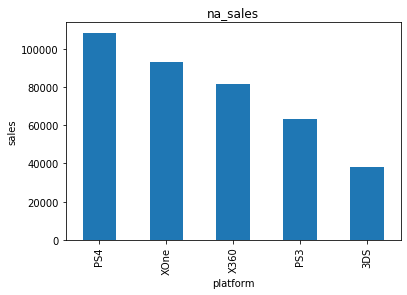

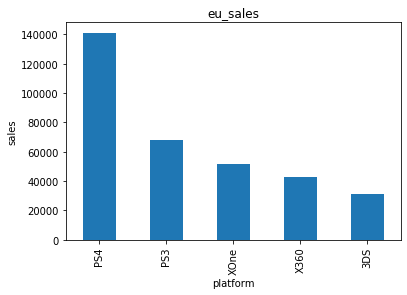

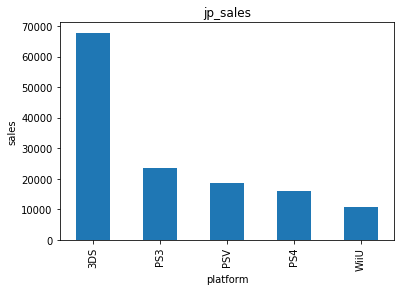

In [425]:
features = ['na_sales', 'eu_sales', 'jp_sales']

for i in features:
    platform_rating = platform_local_groupped.sort_values(i, ascending=False)[i]
    platform_rating[:5].plot.bar()
    plt.title(i)
    plt.ylabel('sales')
    plt.show()
    print()    
    

Для каждого сегмента рынка наибольшую популярность имеют различные платформы.

#### 2) Определение самых популярных жанров

Создадим таблицу с жанром и продажами

In [426]:
genre_local = games[['genre', 'na_sales', 'eu_sales', 'jp_sales']]
genre_local.head()

,genre,na_sales,eu_sales,jp_sales
16,Action,7020,9090,980
23,Action,9660,5140,60
31,Shooter,6030,5860,360
33,Role-Playing,5280,4190,4350
42,Action,3960,6310,380


In [427]:
genre_local_groupped = genre_local.groupby('genre').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})
genre_local_groupped.head()

,na_sales,eu_sales,jp_sales
genre,,,
Action,126050,118130,40490
Adventure,7140,8250,5820
Fighting,15550,8550,7650
Misc,27489,20040,9200
Platform,18140,15580,4790


Отсортируем каждый столбец по убыванию суммы продаж и построим графики.

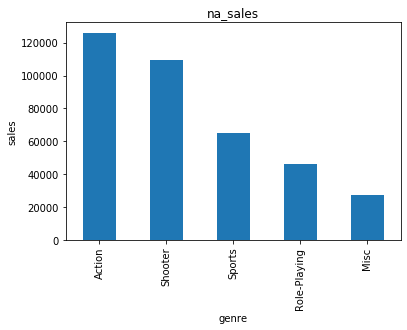

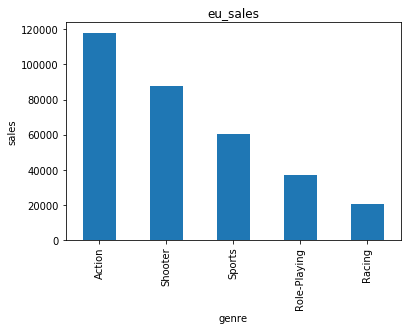

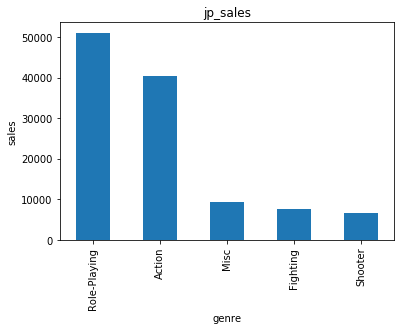

In [428]:
features = ['na_sales', 'eu_sales', 'jp_sales']

for i in features:
    genre_rating = genre_local_groupped.sort_values(i, ascending=False)[i]
    genre_rating[:5].plot.bar()
    plt.title(i)
    plt.ylabel('sales')
    plt.show()
    print()    

Популярные жанры оказались практически одинаковыми для Америки и Европы. 

В Японии же значения распределились по-своему.

#### 3) Влияние рейтинга ESRB на продажи в отдельном регионе

Составим таблицу из рейтинга ESRB и продаж в каждом регионе

In [429]:
esrb_sales = games[['rating', 'na_sales', 'eu_sales', 'jp_sales']]
esrb_sales.head()

,rating,na_sales,eu_sales,jp_sales
16,M,7020,9090,980
23,M,9660,5140,60
31,unknown,6030,5860,360
33,unknown,5280,4190,4350
42,M,3960,6310,380


Не будем учитывать данные с неизвестным рейтингом

In [430]:
esrb_sales = esrb_sales.query('rating != "unknown"')
esrb_sales.head()

,rating,na_sales,eu_sales,jp_sales
16,M,7020,9090,980
23,M,9660,5140,60
42,M,3960,6310,380
60,M,6730,2560,40
69,M,4100,3630,380


Сгруппируем таблицу esrb_sales по рейтингу и продажам в разных регионам

In [431]:
esrb_sales_groupped = esrb_sales.groupby('rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})
esrb_sales_groupped.head()

,na_sales,eu_sales,jp_sales
rating,,,
E,79050,83360,15140
E10+,54240,42690,5890
M,165210,145320,14110
T,49790,41950,20590


<Figure size 2160x720 with 0 Axes>

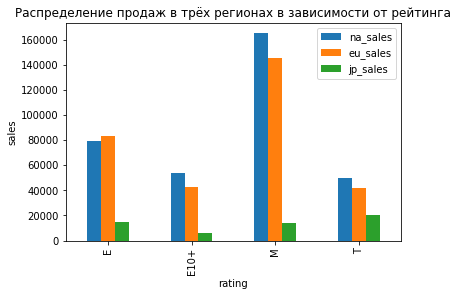

In [432]:
plt.figure(figsize=(30, 10))
esrb_sales_groupped.plot.bar()
plt.title('Распределение продаж в трёх регионах в зависимости от рейтинга')
plt.ylabel('sales')
plt.show()



Хорошо заметно, что рейтинг ESRB заметно влияет на продажи в конкретном регионе.

### Вывод

В этом разделе выявлено, что:
- продажи игр по платформам сильно отличаются друг отдруга. В каждом регионе список лидеров свой;
- продажи по жанрам практически не отличаются для Америки и Европы, ~~и только в Японии популярен жанр Role-Playing~~ но другие в Японии;
- рейтинг ESRB сильно влияет на продажи в каждом отдельно взятом регионе.




### 5. Проверка гипотез

#### 1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

ВЫделим данные для Xbox One и PC

In [433]:
games['platform'].unique() # узнаем, как в таблице называется Xbox One и PC

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [434]:
table_xbox = games.query('platform == "XOne"') # cрез для Xbox One
table_pc = games.query('platform == "PC"') # срез для PC

In [435]:
#Вычислим средние значения для Xbox и PC
print('Среднее значения пользовательского рейтинга для Xbox One:', table_xbox['user_score'].mean())
print('Среднее значения пользовательского рейтинга для PC:', table_pc['user_score'].mean())

Среднее значения пользовательского рейтинга для Xbox One: 66.4493927125506
Среднее значения пользовательского рейтинга для PC: 64.08465608465609


Сформулируем нулевую и альтернативную гипотезы:
- H0 (нулевая гипотеза): "средние пользовательские рейтинги плятформ Xbox One и PC одинаковые"
- H1 (альтернативная гипотеза): "средние пользовательские рейтинги плятформ Xbox One и PC разные"

Т.к. нам нужно сравнить между собой два набора данных, то будем использовать Гипотезу о равенстве средних двух генеральных совокупностей.

In [436]:
import scipy.stats as st

alpha = 0.05 # критический уровень значимости

results = st.ttest_ind(
    table_xbox['user_score'], 
    table_pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08114900023766605
Не получилось отвергнуть нулевую гипотезу


Нельзя отвергать нулевую гипотезу, есть вероятность того, что рейтинги окажутся одинаковыми.

#### 2) Cредние пользовательские рейтинги жанров Action и Sports разные

Создадим срез по жанрам Action и Sports

In [437]:
table_action = games.query('genre == "Action"')
table_sports = games.query('genre == "Sports"')

In [438]:
#Вычислим средние значения рейтингов для жанров Action и Sports
print('Среднее значения пользовательского рейтинга для жанра Action:', table_action['user_score'].mean())
print('Среднее значения пользовательского рейтинга для жанра Sports:', table_sports['user_score'].mean())

Среднее значения пользовательского рейтинга для жанра Action: 69.1266318537859
Среднее значения пользовательского рейтинга для жанра Sports: 56.299065420560744


Сформулируем нулевую и альтернативную гипотезы:
- H0: "средние пользовательские рейтинги жанров Action и Sports одинаковые"
- H1: "средние пользовательские рейтинги жанров Action и Sports разные"

Нам снова необходимо сравнить два набора данных из одной совокупности, поэтому воспользуемся той же гипотезой, что и в первом случае.

In [439]:
alpha = 0.05 # критический уровень значимости

results = st.ttest_ind(
    table_action['user_score'], 
    table_sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.746644828771995e-42
Отвергаем нулевую гипотезу


Опровергаем нулевую гипотезу, но не отклоняем альтернативную. Это значит, что средние пользовательские рейтинги жанров Action и Sports могут быть разными.



### Общий вывод

В проведенном исследовании были выявлены определяющие успешность игры закономерности. Из общего количества данных была извлечена актуальная информация, показывающая на данные какого периода времени можно опираться, проводя исследование.


Также было установлено следующее:
 - лидирующие по продажам платформы (3DS и PS4), на основании которых можно строить предположение о продажх на следующий год;
 - отзывы пользователей и критиков внутри обеих популярных платформ не влияют на продажи;
 - самый прибыльный жанр игры - Action;
 - популярные платформы для трех разных сегментов рынка (Северная Америка, Европа и Япония). Выяснилось, что в каждой местности    популярные платформы свои;
 - популярные жанры для каждого сегмента. Здесь оказалось больше сходств, чем для платформ;
 - рейтинг ESRB определенно влияет на продажи в каждом отдельно взятом регионе;

Были сформулированы гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Первую гипотезу не удалось отвергнуть, вторую отвергли.

В исследовании был отработан принцип работы с данными для прогнозирования продаж на следующий год и будущего запуска рекламы.





